<a href="https://colab.research.google.com/github/MbuguaKanai/Multi-Class-Image-Classification-Project/blob/main/Copy_of_Cancer_CNN_Project_10_10_Phelix_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> **SKIN CONDITIONS MULTI-CLASS IMAGE CLASSIFICATION USING CNN**
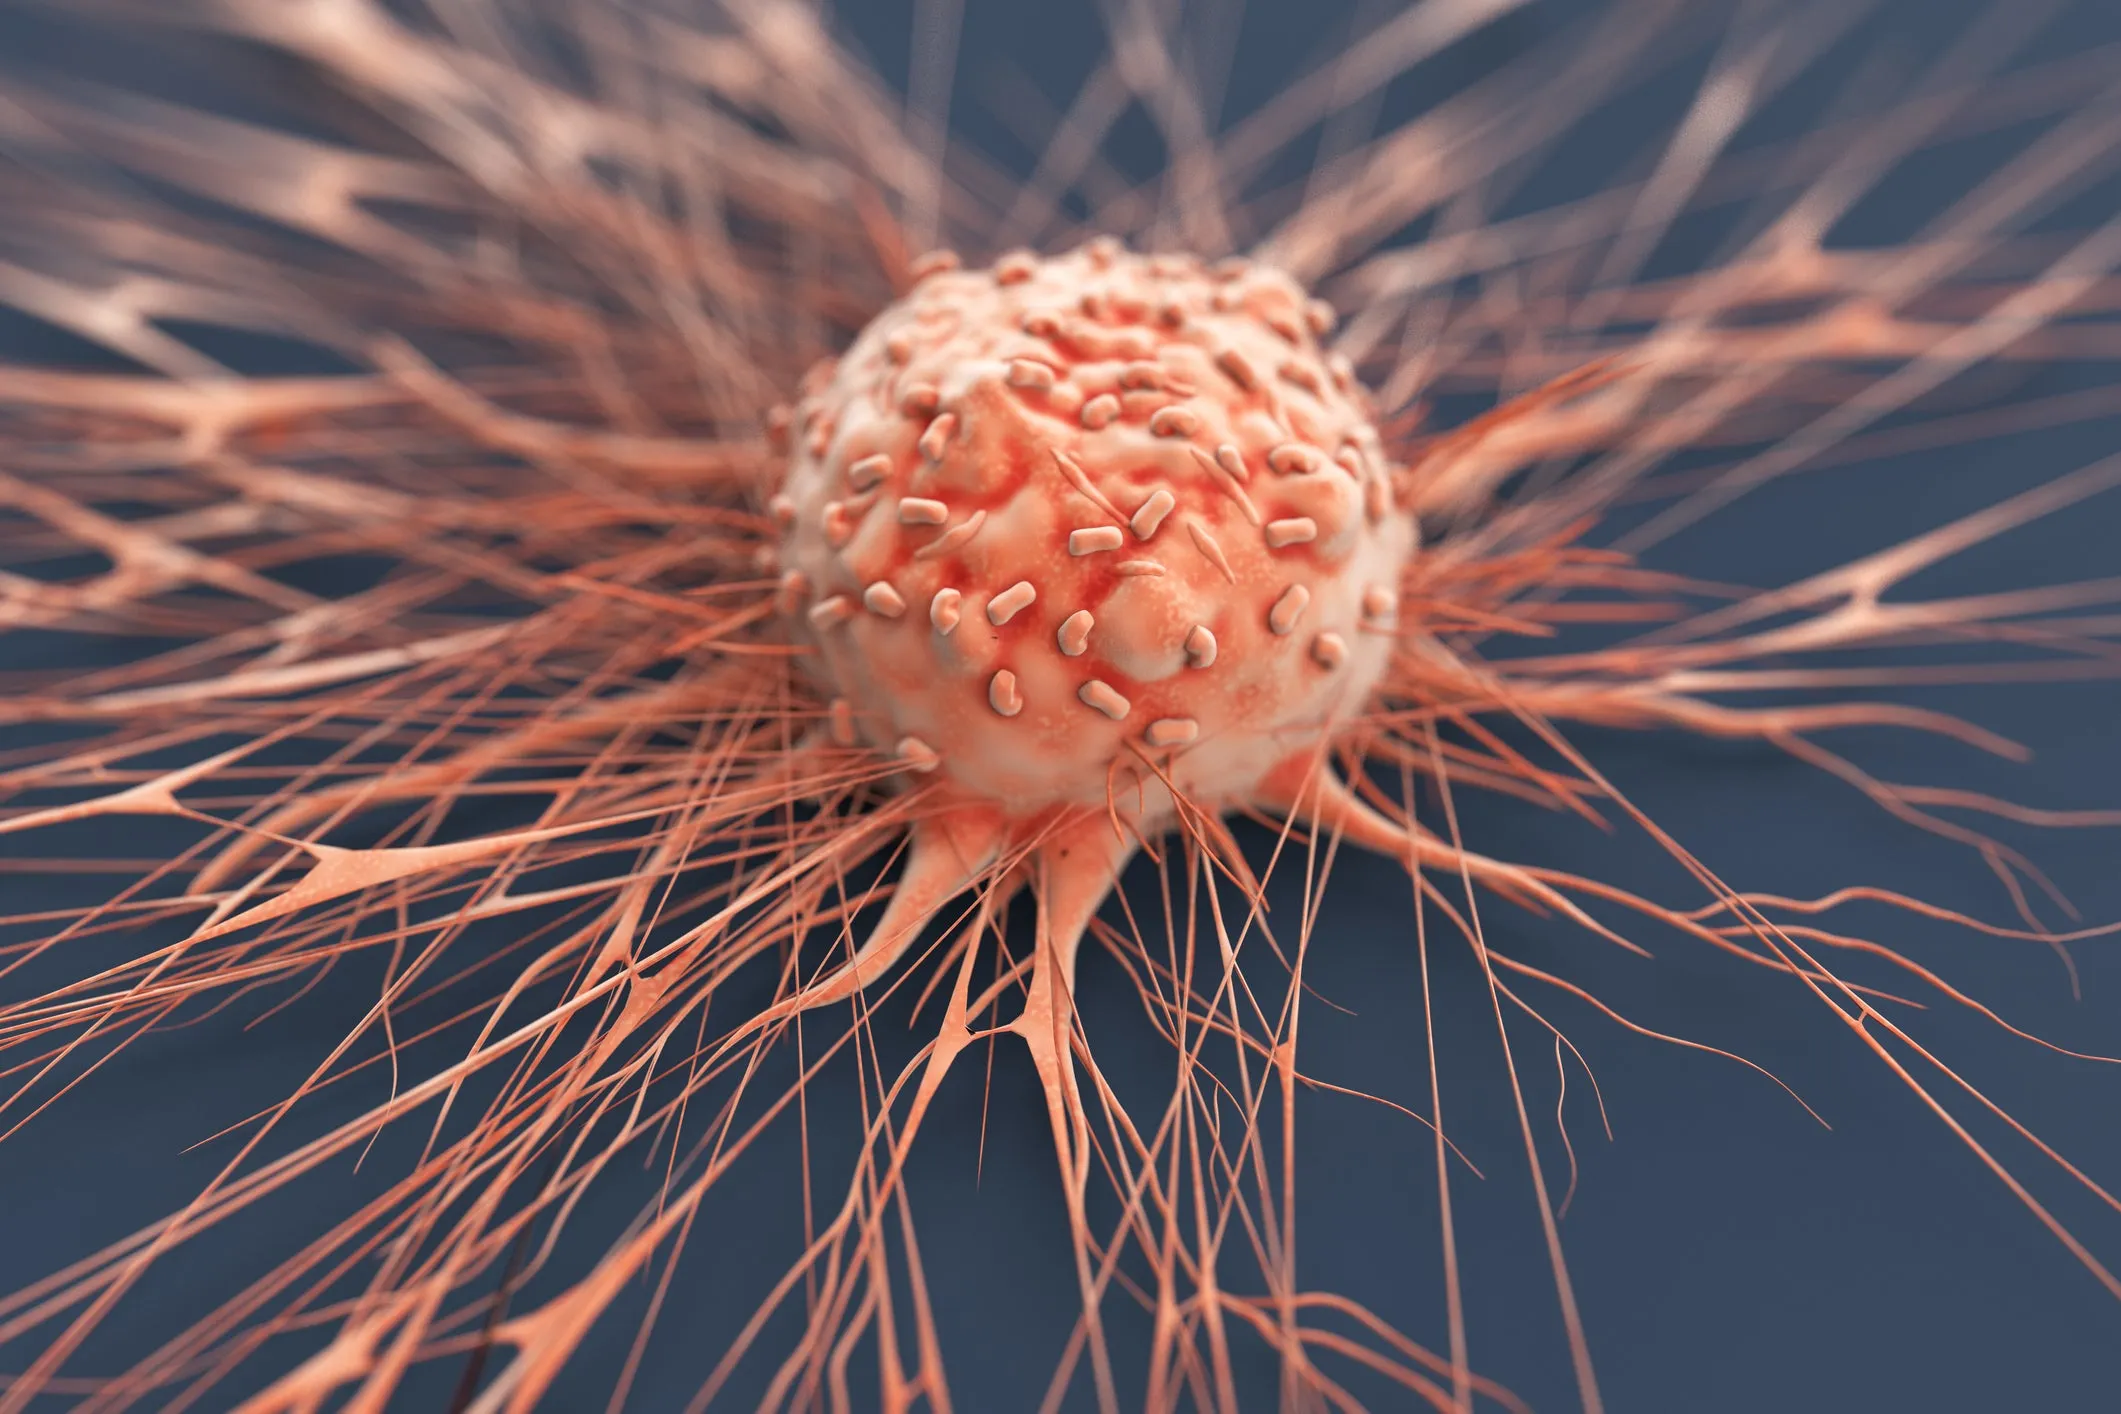

# **1.0 BUSINESS UNDERSTANDING**

Skin conditions presents in many different forms impacting individuals'overall health and well-being. Some of these skin conditions can be challenging to categorize and detect, which introduces complexity to the field of dermatology. The importance of accurate diagnosis cannot be overstated, as certain skin disorders, including various types of skin cancer, have the potential to be life-threatening. Early and accurate identification of the types of skin condition is of great importance. The diagnostic process typically involves a range of methods, including visual image inspections, biopsies, and histopathological analyses. Distinguishing between benign and malignant lesions is particularly important as even minor or inconspicuous abnormalities can be difficult to detect. In response to these diagnostic challenges, cutting-edge technologies like deep learning algorithms offer the potential to revolutionize dermatological diagnostics, enhancing efficiency, reducing errors, and ultimately improving patient outcomes across various skin condition types.
Read more on below links:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5817488/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6403009/


## **1.1 Problem Statement**
Dermatologists at Flatter Dermatological Clinic are facing difficulties in accurately determining or categorizing various skin conditions types when examining medical skin images. Currently, this task heavily relies on manual visual inspection and personal judgment which is time-consuming,  prone to human error and can result in delayed or inaccurate diagnoses. This inefficiency increases the chances of missing important skin conditions patterns and making mistakes which could have life-threatening consequences.

## **1.2 Objectives**
**Main Objective:** To build a convolutional neural network model capable of classifying the 9 different types of skin conditions with 70% precision.

Other objectives are;
- To explore the distribution of the different types of skin condition images in the dataset.
- To assess the quality and consistency of images in the dataset.



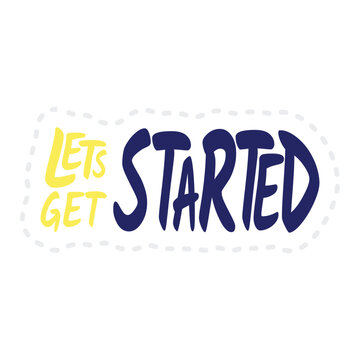

**Importing the relevant libraries**

In [1]:
import cv2
import PIL
import glob
import time
import scipy
import random
import pathlib
import warnings
import os,shutil
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from scipy import ndimage
from sklearn.manifold import TSNE
from tensorflow.keras import layers
from skimage import io, color, feature
from keras.utils import to_categorical
from keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from skimage.feature import graycomatrix, graycoprops
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, LeakyReLU, BatchNormalization, Activation
warnings.filterwarnings("ignore")

In [2]:
#Creating a directory within Colab environment
!mkdir -p /content/mydrive

In [3]:
# mounting Google Drive into the directory
from google.colab import drive
drive.mount('/content/mydrive', force_remount=True)


Mounted at /content/mydrive


In [4]:
# Defining the path for train and test images
train_data_dir = pathlib.Path("/content/mydrive/MyDrive/CNN_PROJECT/data_cnn/Train")
test_data_dir = pathlib.Path("/content/mydrive/MyDrive/CNN_PROJECT/data_cnn/Test")


# **2.0 DATA UNDERSTANDING**
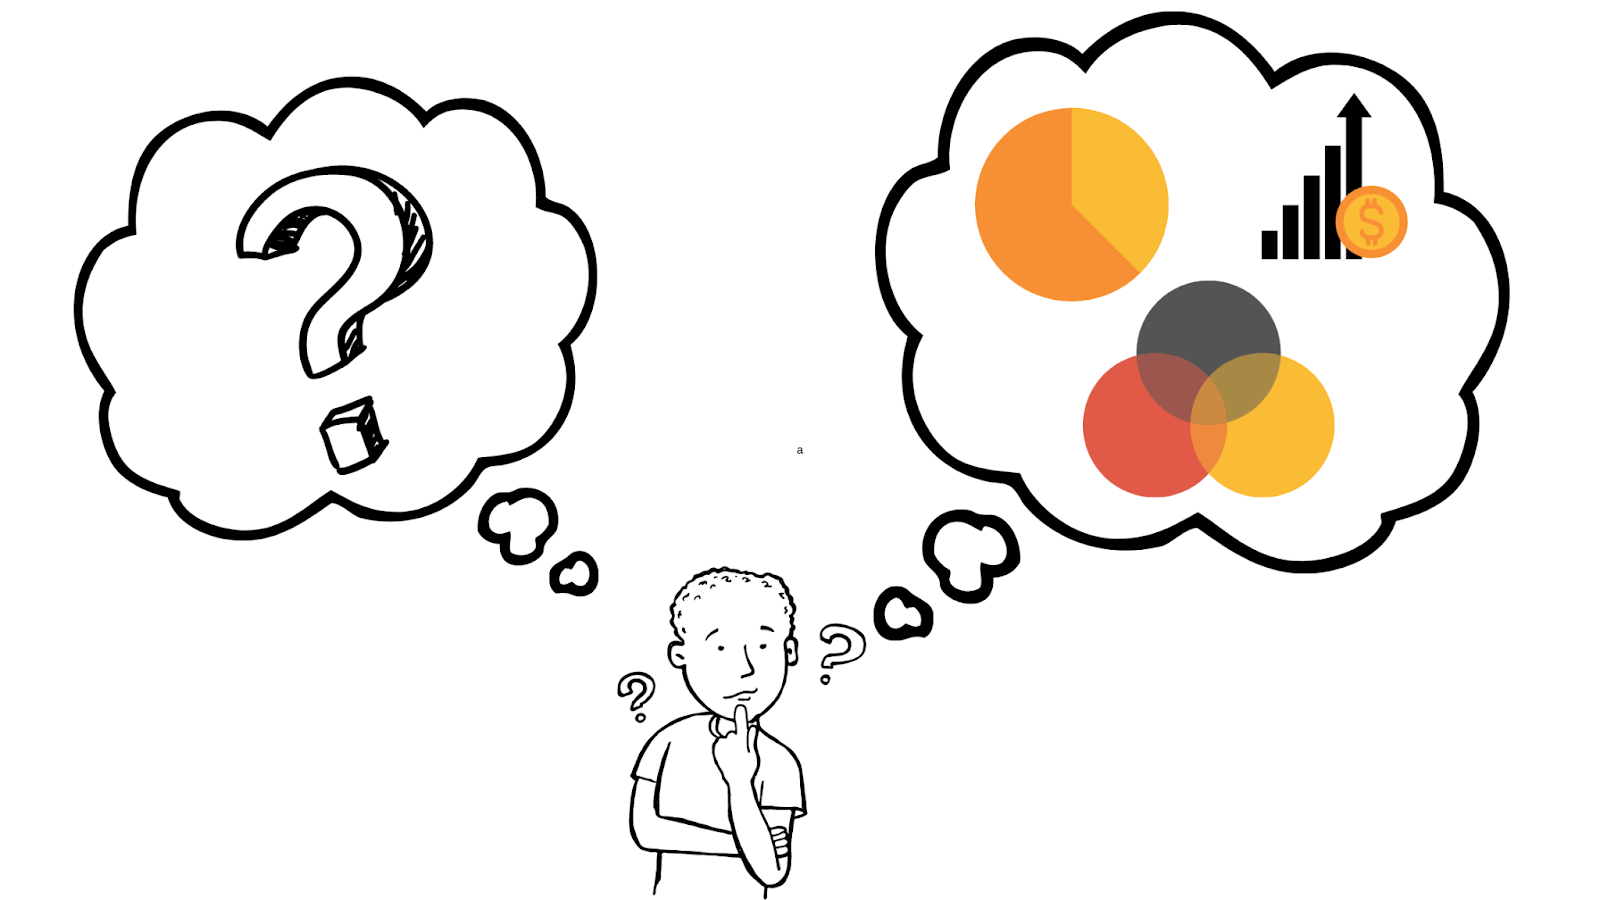


The dataset consists of 2357 images of malignant and benign skin diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
The data set contains the following 9 skin diseases:

1. **Actinic Keratosis (AK)**: Precancerous skin condition characterized by rough, scaly patches caused by sun exposure.

2. **Basal Cell Carcinoma (BCC**): The most common and usually non-aggressive form of skin cancer, often appearing as a pearly bump on sun-exposed areas.

3. **Dermatofibroma**: Benign skin tumor that presents as a firm, reddish-brown bump on the skin's surface.

4. **Melanoma**: Highly aggressive form of skin cancer originating from melanin-producing cells, often manifesting as irregular, dark moles or new skin lesions.

5. **Nevus (Mole)**: A common and usually harmless skin growth, though changes should be monitored for signs of melanoma.

6. **Pigmented Benign Keratosis**: A non-cancerous growth appearing as raised, scaly lesions of various colors.

7. **Squamous Cell Carcinoma (SCC)**: A skin cancer arising from sun-exposed areas, typically presenting as a red, scaly patch or non-healing sore.

8. **Vascular Lesion**: Abnormal blood vessels on the skin's surface, including conditions like hemangiomas and port-wine stains, usually non-cancerous but may require treatment.

9. **Seborrheic Keratosis**: a common benign skin growth characterized by raised, waxy, and often pigmented lesions that can appear anywhere on the body, typically in older individuals.


## **2.1 Count of Images**

In [5]:
# Counting Test and Train sets
image_count_train = len(list(train_data_dir.glob('*/*.jpg')))
print("Train images:", image_count_train)
image_count_test = len(list(test_data_dir.glob('*/*.jpg')))
print("Test images:", image_count_test)

Train images: 2239
Test images: 118


In [6]:
# Counting images from each class
class_names = sorted([dir.name for dir in train_data_dir.glob('*')])

class_names_list = []
train_counts = []
test_counts = []
for class_name in class_names:
    train_class_dir = train_data_dir / class_name
    test_class_dir = test_data_dir / class_name

    train_count = len(list(train_class_dir.glob('*.jpg')))
    test_count = len(list(test_class_dir.glob('*.jpg')))

    class_names_list.append(class_name)
    train_counts.append(train_count)
    test_counts.append(test_count)

# Create a Pandas DataFrame
data = {
    "Class Name": class_names_list,
    "Train Images": train_counts,
    "Test Images": test_counts
}
df = pd.DataFrame(data)
df.reset_index(inplace=True, drop=True)

print(df)

                   Class Name  Train Images  Test Images
0           actinic keratosis           114           16
1        basal cell carcinoma           376           16
2              dermatofibroma            95           16
3                    melanoma           438           16
4                       nevus           357           16
5  pigmented benign keratosis           462           16
6        seborrheic keratosis            77            3
7     squamous cell carcinoma           181           16
8             vascular lesion           139            3


The above 2 cells of code shows as follows:

* Our dataset comprises 2,239 samples for the training set and 118 samples for the test set.
* The count of samples for each of the 9 classes in the training set varies, ranging from 77 to 462.
* In the test set 7 of the classes consist of 16 samples each, while 2 classes have only 3 samples each.


# **3.0 EXPLORATIVE DATA ANALYSIS (EDA)**
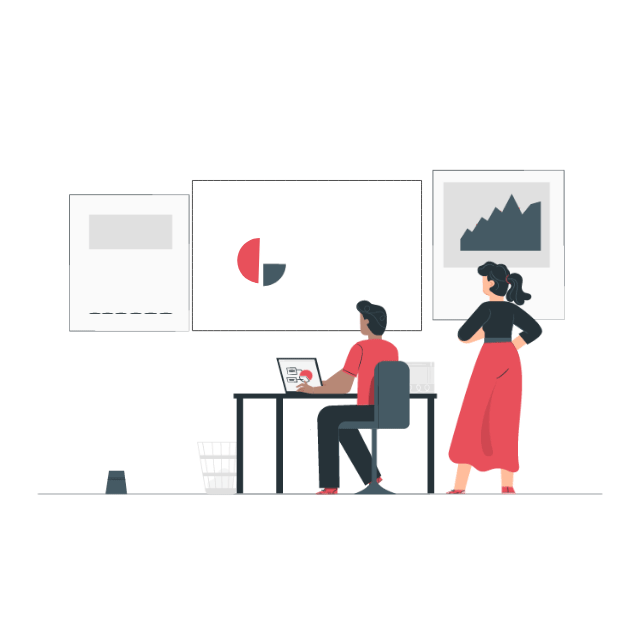

## **3.1 Image counts**

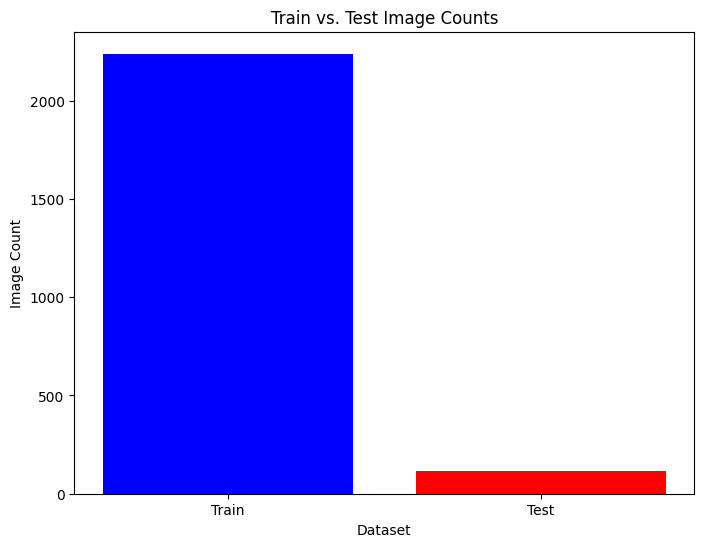

In [7]:
# Visualization of Train and Test sets
image_count_train = len(list(train_data_dir.glob('*/*.jpg')))
image_count_test = len(list(test_data_dir.glob('*/*.jpg')))

categories = ['Train', 'Test']
counts = [image_count_train, image_count_test]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Dataset')
plt.ylabel('Image Count')
plt.title('Train vs. Test Image Counts')
plt.show()

The above shows visualization of the distribution of Train and Test sets.

##**3.2 Cancerous and Non-Cancerous images**

In [8]:
# Creating a new column 'Cancerous' to categorize conditions as cancerous or non-cancerous
df['Cancerous'] = df['Class Name'].apply(lambda x: 'Cancerous' if x in ['melanoma', 'basal cell carcinoma', 'squamous cell carcinoma'] else 'Non-Cancerous')

# Counting the number of cancerous and non-cancerous conditions in the training set
train_cancerous_count = df[df['Cancerous'] == 'Cancerous']['Train Images'].sum()
train_non_cancerous_count = df[df['Cancerous'] == 'Non-Cancerous']['Train Images'].sum()

# Counting the number of cancerous and non-cancerous conditions in the test set
test_cancerous_count = df[df['Cancerous'] == 'Cancerous']['Test Images'].sum()
test_non_cancerous_count = df[df['Cancerous'] == 'Non-Cancerous']['Test Images'].sum()

# Calculating the total counts of cancerous and non-cancerous conditions
total_cancerous_count = train_cancerous_count + test_cancerous_count
total_non_cancerous_count = train_non_cancerous_count + test_non_cancerous_count

print("Cancerous Skin Conditions (Train):", train_cancerous_count)
print("Non-Cancerous Skin Conditions (Train):", train_non_cancerous_count)
print("Cancerous Skin Conditions (Test):", test_cancerous_count)
print("Non-Cancerous Skin Conditions (Test):", test_non_cancerous_count)
print("Total Cancerous Skin Conditions:", total_cancerous_count)
print("Total Non-Cancerous Skin Conditions:", total_non_cancerous_count)

Cancerous Skin Conditions (Train): 995
Non-Cancerous Skin Conditions (Train): 1244
Cancerous Skin Conditions (Test): 48
Non-Cancerous Skin Conditions (Test): 70
Total Cancerous Skin Conditions: 1043
Total Non-Cancerous Skin Conditions: 1314


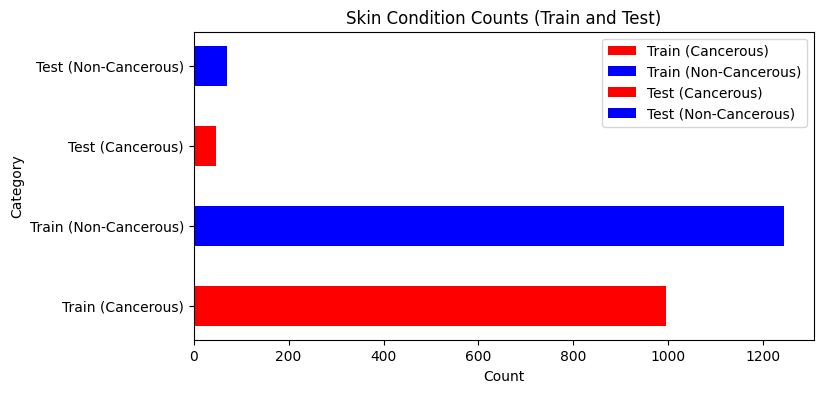

In [9]:
categories = ['Train (Cancerous)', 'Train (Non-Cancerous)', 'Test (Cancerous)', 'Test (Non-Cancerous)']
counts = [train_cancerous_count, train_non_cancerous_count, test_cancerous_count, test_non_cancerous_count]

# Calculating total counts
total_cancerous_count = train_cancerous_count + test_cancerous_count
total_non_cancerous_count = train_non_cancerous_count + test_non_cancerous_count
total_counts = [total_cancerous_count, total_non_cancerous_count, total_cancerous_count, total_non_cancerous_count]

# Stacked horizontal bar chart
plt.figure(figsize=(8, 4))
bottom = [0, 0, 0, 0]
colors = ['red', 'blue', 'red', 'blue']
bar_width = 0.5

for i in range(len(categories)):
    plt.barh(categories[i], counts[i], height=bar_width, left=bottom[i], color=colors[i], label=categories[i])
    bottom[i] += counts[i]

plt.title('Skin Condition Counts (Train and Test)')
plt.ylabel('Category')
plt.xlabel('Count')
plt.legend()
plt.show()

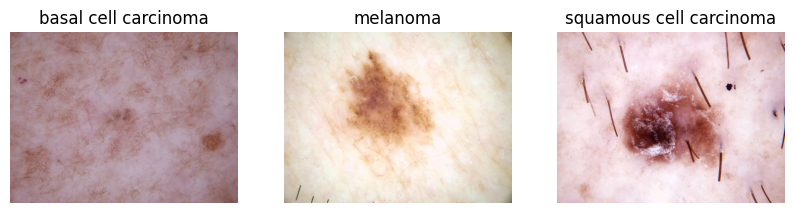

In [10]:
# Random dispay of cancerous images
plt.figure(figsize=(10, 10))
cancerous_indices = [i for i, class_name in enumerate(class_names) if class_name in ['melanoma', 'basal cell carcinoma', 'squamous cell carcinoma']]

for i, idx in enumerate(cancerous_indices):
    plt.subplot(3, 3, i + 1)
    class_dir = random.choice(list(train_data_dir.glob(class_names[idx] + '/*.jpg')))
    image = plt.imread(str(class_dir))
    plt.title(class_names[idx])
    plt.imshow(image)
    plt.axis("off")
plt.show()

From the above visualization we are able to see cancerous skin images with distinct appearances in each random view.

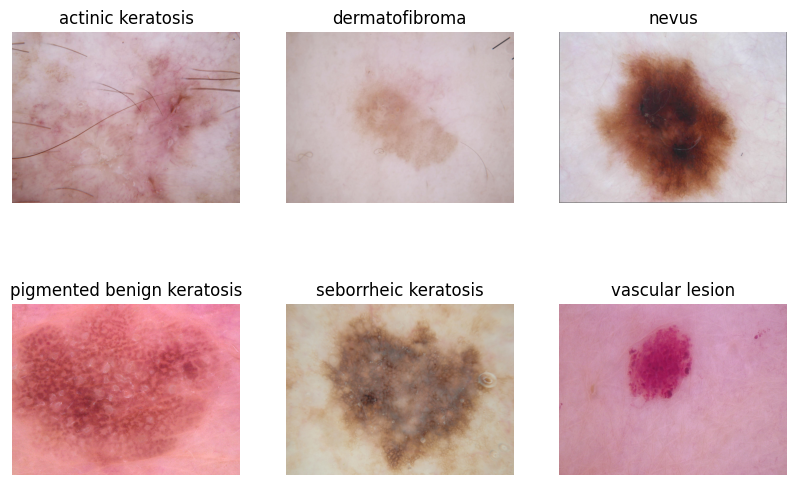

In [11]:
# Random display of non-cancerous images
plt.figure(figsize=(10, 10))
non_cancerous_indices = [i for i in range(len(class_names)) if i not in cancerous_indices]

for i, idx in enumerate(non_cancerous_indices):
    plt.subplot(3, 3, i + 4)
    class_dir = random.choice(list(train_data_dir.glob(class_names[idx] + '/*.jpg')))
    image = plt.imread(str(class_dir))
    plt.title(class_names[idx])
    plt.imshow(image)
    plt.axis("off")

plt.show()

The above non-cancerous images show distinct patches from pinkish, black, red and purple in colour.

## **3.3 Random sample Images**

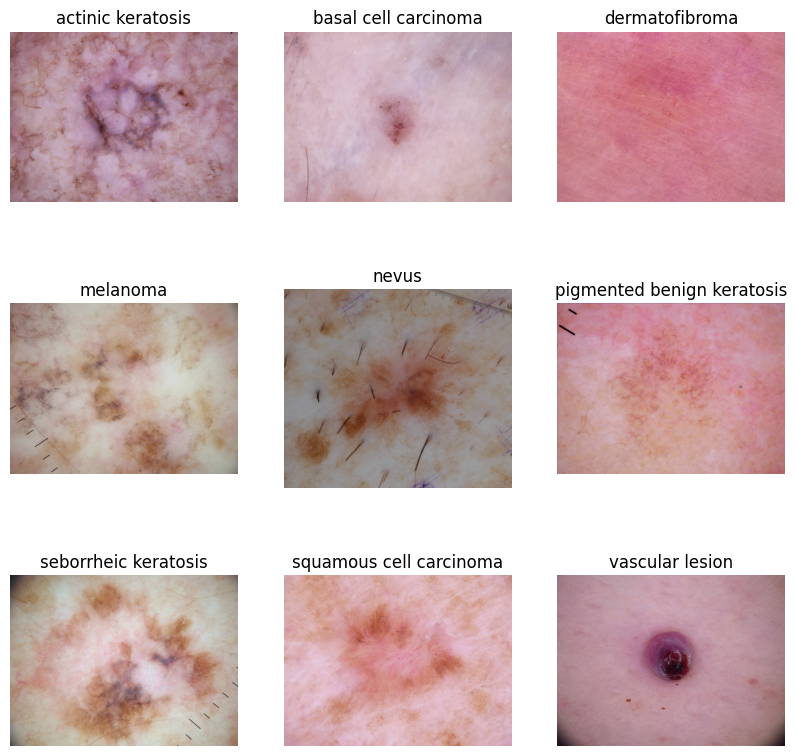

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    class_dir = random.choice(list(train_data_dir.glob(class_names[i] + '/*.jpg')))
    image = plt.imread(str(class_dir))
    plt.title(class_names[i])
    plt.imshow(image)
    plt.axis("off")
plt.show()

## **3.4 Class Distribution**

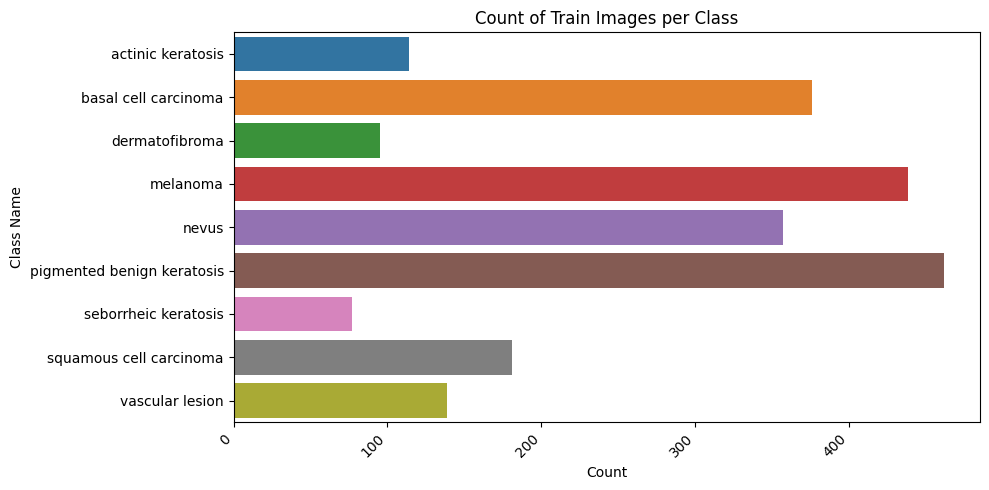

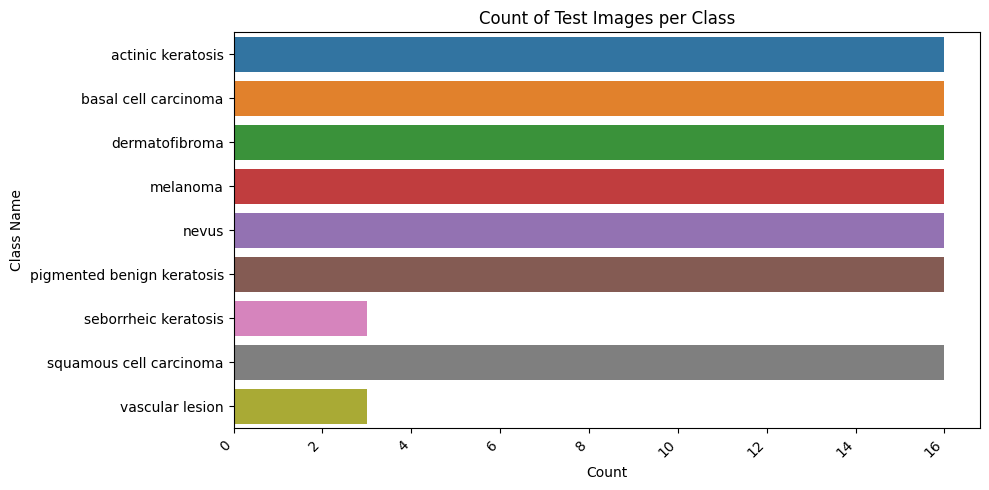

In [13]:
columns_to_plot = ["Train Images", "Test Images" ]

def plot_bar_chart(column):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, y='Class Name', x=column, orient ='h')
    plt.title(f"Count of {column} per Class")
    plt.xlabel("Count")
    plt.ylabel("Class Name")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for column in columns_to_plot:
    plot_bar_chart(column)


From the bar Graphs above, the following observatiaons can be made:
- The train class is relatively imbalanced compared to the test set.
- There are less instances of particular skin cancer types in both train and test which may impact on the model's ability to generalize.

##**3.5 Height and Width Distribution of Images**

In [ ]:
def create_histogram(data, title, color):
    plt.hist(data, bins=20, color=color, alpha=0.7)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {title}s')

# Defining subdirectories
subdirectories = [train_data_dir, test_data_dir]

image_widths = []
image_heights = []

for subset_dir in subdirectories:
    subset_name = os.path.basename(subset_dir)
    classes = os.listdir(subset_dir)

    for class_name in classes:
        class_dir = os.path.join(subset_dir, class_name)
        sample_images = os.listdir(class_dir)

        for image_name in sample_images:
            image_path = os.path.join(class_dir, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            height, width = img.shape[:2]
            image_widths.append(width)
            image_heights.append(height)

# Creating histograms for image widths and heights
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
create_histogram(image_widths, 'Image Width', 'blue')

plt.subplot(1, 2, 2)
create_histogram(image_heights, 'Image Height', 'red')
plt.tight_layout()
plt.show()

##**3.6 Density Distribution (Weight Vs Height)**

In [ ]:
plt.figure(figsize=(11, 5))
plt.subplot(1, 2, 1)
plt.hexbin(x=image_widths, y=image_heights, gridsize=20, cmap='Blues')
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Hexbin Plot of Image Dimensions (Width vs. Height)')
plt.tight_layout()
plt.show()


Visualization of the weights and heights of the images show that;
- Most of the images have widths ranging from 450 to 1100
- Most images have thier heightd ranging from 450 -800

The density plot reveals that most of the images are approximately sized as 500 *450

## **3.7 Class Separation**

In [ ]:
# Defining the classes in the data directory
classes = os.listdir(train_data_dir)

feature_vectors = []
class_labels = []

def extract_features(image):
    resized_image = cv2.resize(image, (64, 64))
    feature_vector = resized_image.flatten()
    return feature_vector

for i, class_name in enumerate(classes):
    class_dir = os.path.join(train_data_dir, class_name)
    sample_images = os.listdir(class_dir)

    for image_name in sample_images:
        image_path = os.path.join(class_dir, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        feature_vector = extract_features(img)

        feature_vectors.append(feature_vector)
        class_labels.append(i)

# Standardizing the features vectors (mean=0, std=1)
scaler = StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)

# Applying t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(feature_vectors)

# Creating a scatter plot to visualize class separation
plt.figure(figsize=(8, 6))
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=class_labels, cmap='viridis')
plt.title("t-SNE Visualization of Class Separation")
plt.colorbar()
plt.show()


From the tSNE visualization on class separation, the classes are spread all over and there are no clear cut separation of classes.

- t-SNE showing no clear class separation implies:
  - Complex or similar visual characteristics in the data.
  - Potential challenges for image classification.
- We shall use advanced techniques  to enhance accuracy in classification of the images into the nine cancer types. These include:
  - Deep learning,
  - CNN, and
  - ensemble methods
- We shall also use appropriate metrics considering class imbalance.


## **3.8 Texture Analysis**

In [ ]:
# List of class folders containing images
class_folders = os.listdir(train_data_dir)

# GLCM properties to calculate
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Creating an empty dictionary to store histograms for each property
property_histograms = {prop: [] for prop in properties}

# Calculating GLCM Features for Each Image in Each Class:
for folder in class_folders:
    class_path = os.path.join(train_data_dir, folder)
    image_files = os.listdir(class_path)

    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image = io.imread(image_path)
        gray_image = color.rgb2gray(image)
        gray_image = (gray_image * 255).astype(np.uint8)
        glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)
        features = [feature.graycoprops(glcm, prop)[0, 0] for prop in properties]

        for prop, feature_value in zip(properties, features):
            property_histograms[prop].append((folder, feature_value))

# Creating subplots for each property
num_properties = len(properties)
fig, axes = plt.subplots(1, num_properties, figsize=(20, 5))
for i, prop in enumerate(properties):
    ax = axes[i]
    ax.set_xlabel(prop.capitalize())
    ax.set_ylabel('Frequency')
    ax.set_title(f'{prop.capitalize()} Histograms')

    # Plotting histograms for each class
    for folder in class_folders:
        subset = [value for label, value in property_histograms[prop] if label == folder]
        ax.hist(subset, bins=20, alpha=0.5, label=folder)

    ax.legend(title='Class')


plt.tight_layout()

plt.show()

We can draw the following key insights from our texture analysis:

- Majority of the images have low contrast of below 100.
- Most classes exhibit a near normal distribution in their homogeneity or similarity. This means that there is great diversity among images in the classes.
- Most classes have their images having low energy. This means that there is less variability in pixel intensity of the images.


## **3.9 RGB Visualization**

In [ ]:
# Number of random images to display
i=0
num_images_to_display = 2

# Create a function to plot color channels
def plot_color_channels(image, class_name):
    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Split the image into color channels
    blue_channel, green_channel, red_channel = cv2.split(image)

    # Create subplots for displaying color channels
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    axes[0].imshow(image)
    axes[0].set_title(class_name)
    axes[0].axis("off")
    for i, (channel, cmap_name) in enumerate(zip([red_channel, green_channel, blue_channel], ['Reds', 'Greens', 'Blues'])):
        axes[i+1].imshow(channel, cmap=cmap_name)
        axes[i+1].set_title(f"{class_name} - {cmap_name.split('_')[0].capitalize()} Channel")
        axes[i+1].axis("off")

# Loop to display random images with color channels
for _ in range(num_images_to_display):
    # Get a list of image files in the class directory
    class_dir = list(train_data_dir.glob(class_names[i] + '/*.jpg'))

    if not class_dir:
        # Handle the case where there are no images in the directory
        print(f"No images found in the {class_names[i]} directory.")
    else:
        # Choose a random image from the list
        random_image = random.choice(class_dir)
        image = cv2.imread(str(random_image))

        # Call the function to plot color channels
        plot_color_channels(image, class_names[i])

plt.tight_layout()
plt.show()

The RGB visualization above shows an image as it appears in red, blue and green color channels. The images seem to be clearer on the red color channel.

## **3.10 Pixel Intensity**

In [ ]:
base_directory = '/content/mydrive/MyDrive/CNN_PROJECT/data_cnn/Train'
# Creating a pattern to match image files (e.g., all files ending with '.jpg')
image_pattern = '*.jpg'

# list of class subdirectories
class_directories = glob.glob(base_directory + '*/')


for class_dir in class_directories:
    class_name = os.path.basename(os.path.normpath(class_dir))
    image_paths = glob.glob(class_dir + image_pattern)

    for image_path in image_paths:
        # Loading an image using OpenCV
        image = cv2.imread(image_path)

       # Converting the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Computing histogram of grayscale pixel intensities
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.hist(gray_image.ravel(), bins=256, range=(0, 256), density=True, color='b', alpha=0.6)
plt.title('Grayscale Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.show()



Based on the grayscale pixel intensity distribution above:
* The peak is at pixel value of 140 indicating that this value is the most common or frequent pixel value in the grayscale image.
* The highest normalized frequency value of approximately 0.035 represents the probability of encountering a pixel with the value 140 in the image. In other words, about 3% of the pixels in the image have a value of 140.

* The pixel values ranging from around 70 to 170 represent the full range of grayscale pixel values present in the images indicating that the images have a wide range of pixel values, covering both darker and brighter regions.

# **4.0 DATA PREPROCESSING**
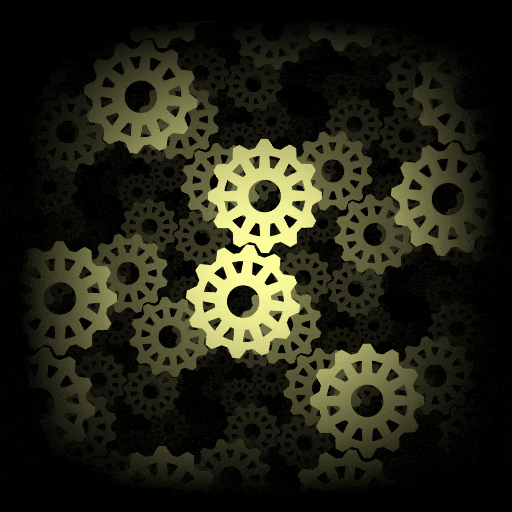

In the upcoming code cells, we will perform the following preprocessing steps on our image dataset:

* Create a new directory named 'split_cnn' to organize images that have been split from the original Train set into Training and Validation sets, while keeping the original Train set intact.

* Verify the counts of the split datasets and ensure the integrity of the original test set.

* Normalize our images by rescaling pixel values to ensure uniformity, and resize them to meet specific size requirements for optimal model performance.

* Address class imbalance issues, where some classes may have significantly more instances than others, to avoid bias towards classes with a higher number of images.

## **4.1 Splitting Data**

In [ ]:
# Defining the destination directories for the training and validation sets
training_data_dir = pathlib.Path("/content/mydrive/MyDrive/CNN_PROJECT/split_cnn/Training_set")
validation_data_dir = pathlib.Path("/content/mydrive/MyDrive/CNN_PROJECT/split_cnn/Validation_set")

# # Creating the destination directories
# training_data_dir.mkdir(parents=True, exist_ok=True)
# validation_data_dir.mkdir(parents=True, exist_ok=True)

# class_dirs = [dir.name for dir in test_data_dir.glob('*')]

# # Splitting the data into training and validation sets while maintaining the original directory structure
# for class_dir in class_dirs:
#     class_images = list((train_data_dir / class_dir).glob('*.jpg'))
#     train_images, val_images = train_test_split(class_images, test_size=0.3, random_state=123)
#     (training_data_dir / class_dir).mkdir(parents=True, exist_ok=True)
#     (validation_data_dir / class_dir).mkdir(parents=True, exist_ok=True)

#     # Copying the images to their respective directories
#     for train_image in train_images:
#         shutil.copy(train_image, training_data_dir / class_dir / train_image.name)

#     for val_image in val_images:
#         shutil.copy(val_image, validation_data_dir / class_dir / val_image.name)

# # print("Data splitting complete.")

## **4.2 Count of image after split**

In [ ]:
#Total Count for created Training_set, Validation_set and Original Test
image_count_training = len(list(training_data_dir.glob('*/*.jpg')))
print("Training images:", image_count_training)
image_count_validation = len(list(validation_data_dir.glob('*/*.jpg')))
print("Validation images:", image_count_validation)
image_count_test = len(list(test_data_dir.glob('*/*.jpg')))
print("Test images:", image_count_test)

## **4.3 Rescaling and Resizing**

In [ ]:
# transforming data in the directory split/train (1574 images)
batch_size =32
class_mode = 'categorical'
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        training_data_dir,
        target_size=(64, 64), batch_size = batch_size, class_mode = class_mode)

# transforming  data in the directory split/validation (677 images)
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        validation_data_dir,
        target_size=(64, 64), batch_size = batch_size, class_mode = class_mode)

# tranforming the data in the directory test (118 images)
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_data_dir,
        target_size=(64, 64), batch_size=batch_size, class_mode = class_mode)

## **4.4 Checking for class imbalance**




In [ ]:
# class labels and counts for the training set
class_labels = train_generator.class_indices
class_counts = train_generator.classes

# Calculating the number of samples in each class
unique_classes, class_counts = np.unique(class_counts, return_counts=True)

# Mapping class labels to class names
class_names = {v: k for k, v in class_labels.items()}

plt.figure(figsize=(10, 5))
plt.bar(class_names.values(), class_counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

The visualization above illustrates the class distribution, highlighting significant imbalances among the classes. Specifically, certain classes, such as sebarrheic keratosis, dermatofibroma, and actinic keratosis, exhibit considerably smaller sample sizes. In contrast, classes like melanoma, pigmented benign keratosis, and basal cell carcinoma are characterized by larger sample sizes.

# **5.0 MODELING**

## **5.1 Baseline Model**

In [ ]:
from sklearn.metrics import f1_score


# defining early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

np.random.seed(123)
model1 = Sequential()
model1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same',
                        input_shape=(64, 64, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(9, activation='softmax'))

from sklearn.metrics import f1_score

model1.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=[Precision(), Recall()])


In [ ]:
history1 = model1.fit(train_generator,
                      epochs=100,
                      validation_data=val_generator,
                      callbacks=[early_stopping])

### Baseline model more modification

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.metrics import Precision, Recall, Accuracy
import numpy as np

# defining early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# Learning rate scheduler function
def lr_scheduler(epoch):
    if epoch < 30:
        return 0.001
    elif epoch < 60:
        return 0.0001
    else:
        return 0.00001

lr_schedule = LearningRateScheduler(lr_scheduler)

np.random.seed(123)
model_1 = Sequential()
model_1.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Conv2D(32, (4, 4), activation='relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))  # Adding dropout layer with 50% dropout rate
model_1.add(Dense(9, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
               optimizer=Adam(learning_rate=0.001),  # You can also use the learning rate scheduler here
               metrics=[Precision(), Recall()])



# Train the model with your training data and validation data, and use the early_stopping callback.


In [ ]:
history_1 = model_1.fit(train_generator,
                       epochs=100,
                       validation_data=val_generator,
                       callbacks=[lr_schedule, early_stopping])


In [ ]:
# Saving the model for easier retrieval in future
import tensorflow as tf

# Assuming you have a trained model named 'model'
model1.save("Baseline_Model.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
baseline_model = load_model("Baseline_Model.h5")

# Visualize the loaded model
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(baseline_model, to_file='baseline_model.png', show_shapes=True)

In [ ]:

# Let us have a close look at Precision of the above model
precision = model1.evaluate(train_generator, verbose=1)[2]
precision_v = model1.evaluate(val_generator, verbose=1)[2]
print("Precision: ", precision)
print("Validation Precision: ", precision_v)

In [ ]:
# # Accessing training history from the 'history' object
# training_loss = history1.history['loss']
# validation_loss = history1.history['val_loss']
# training_accuracy = history1.history['accuracy']
# validation_accuracy = history1.history['val_accuracy']
# training_precision = history1.history['precision']
# validation_precision = history1.history['val_precision']
# training_recall = history1.history['recall']
# validation_recall = history1.history['val_recall']

# # Number of epochs
# epochs = range(1, len(training_loss) + 1)

# # creating a plot
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.plot(epochs, training_loss, 'b-', label='Train_Loss')
# plt.plot(epochs, validation_loss, 'r-', label='Val_Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plotting Metrics
# plt.subplot(122)
# plt.plot(epochs, training_accuracy, 'b-', label='Train_Accuracy')
# plt.plot(epochs, validation_accuracy, 'r-', label='Val_Accuracy')
# plt.plot(epochs, training_precision, 'g-', label='Train_Precision')
# plt.plot(epochs, validation_precision, 'c-', label='Val_Precision')
# plt.plot(epochs, training_recall, 'm-', label='Train_Recall')
# plt.plot(epochs, validation_recall, 'y-', label='Val_Recall')
# plt.title('Training and Validation Metrics')
# plt.xlabel('Epochs')
# plt.ylabel('Metrics')
# plt.legend()


# plt.tight_layout()
# plt.show()


In [ ]:
y_pred = model1.predict(val_generator)
y_true = val_generator.classes

# calculating the confusion matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

# creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##**5.2 Models with Data Augmentation**



### 5.2.1 Model 2: Using Data Augmentation

In [ ]:
pip install Augmentor

In [ ]:
# import Augmentor
# np.random.seed(123)

# # Defining a function to create an Augmentor pipeline
# def create_augmentor_pipeline(input_dir, output_dir, num_samples):
#     p = Augmentor.Pipeline(input_dir, output_dir)
#     p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
#     p.zoom_random(probability=0.5, percentage_area=0.8)
#     p.random_contrast(probability=0.5, min_factor=0.7, max_factor=1.3)
#     p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)
#     p.random_color(probability=0.5, min_factor=0.5, max_factor=2.0)
#     p.random_distortion(probability=0.5, grid_width=4, grid_height=4, magnitude=8)
#     p.flip_left_right(probability=0.5)
#     p.random_erasing(probability=0.2, rectangle_area=0.2)
#     p.sample(5000)

# Define the directories for your augmented data
input_dir = '/content/mydrive/MyDrive/CNN_PROJECT/split_cnn/Training_set'
output_dir = '/content/mydrive/MyDrive/CNN_PROJECT/split_cnn/Augmented_set1'

# # Create an Augmentor pipeline and generate augmented data
# create_augmentor_pipeline(input_dir, output_dir, num_samples=5000)

In [ ]:
output_dir = '/content/mydrive/MyDrive/CNN_PROJECT/split_cnn/Augmented_set1'
# Now, create data generators for training and validation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load augmented data from the output directory
train_generator2 = train_datagen.flow_from_directory(
    output_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

In [ ]:
class_weights1 = compute_class_weight('balanced', classes=np.unique(train_generator2.classes), y=train_generator2.classes)
class_weights1 = dict(enumerate(class_weights1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
import numpy as np
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Defining early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

np.random.seed(123)

model2 = Sequential()

# Convolutional layers
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(32, (4, 4), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D((2, 2)))

# Flatten layer
model2.add(Flatten())

# Fully connected layers with dropout and batch normalization
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())

model2.add(Dense(9, activation='softmax'))

# Define the initial learning rate
initial_learning_rate = 0.001

# Define a learning rate schedule function
def lr_schedule(epoch):
    """
    Returns a learning rate based on the epoch number.
    You can modify this function to implement different schedules.
    """
    if epoch < 50:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1  # Reduce learning rate by a factor of 10

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[Precision(), Recall()])

# Print a summary of the model
model2.summary()

In [ ]:
history2 = model2.fit(train_generator2,
                      epochs=100,
                      validation_data=val_generator,
                      callbacks=[lr_scheduler, early_stopping])


In [ ]:
# Saving the model for easier retrieval in future
import tensorflow as tf

# Assuming you have a trained model named 'model'
model2.# Saving the model for easier retrieval in future
import tensorflow as tf

# Assuming you have a trained model named 'model'
model4.save("/content/mydrive/MyDrive/CNN_PROJECT/Models/ Model2_Data_Augmentation_final.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
Model2_Data_Augmentation = load_model("Model2_Data_Augmentation_final.h5")

# Visualize the loaded model
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(Model2_Data_Augmentation, to_file='Model2_Data_Augmentation.png', show_shapes=True)

In [ ]:
# Let us have a close look at Precision of the above model
precision = model2.evaluate(train_generator2, verbose=1)[2]
precision_v = model2.evaluate(val_generator, verbose=1)[2]
print("Precision: ", precision)
print("Validation Precision: ", precision_v)

In [ ]:
# # Accessing training history from the 'history' object
# training_loss = history2.history['loss']
# validation_loss = history2.history['val_loss']
# training_accuracy = history2.history['accuracy']
# validation_accuracy = history2.history['val_accuracy']
# training_precision = history2.history['precision']
# validation_precision = history2.history['val_precision']
# training_recall = history2.history['recall']
# validation_recall = history2.history['val_recall']

# # Number of epochs
# epochs = range(1, len(training_loss) + 1)

# # creating a plot
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.plot(epochs, training_loss, 'b-', label='Train_Loss')
# plt.plot(epochs, validation_loss, 'r-', label='Val_Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plotting Metrics
# plt.subplot(122)
# plt.plot(epochs, training_accuracy, 'b-', label='Train_Accuracy')
# plt.plot(epochs, validation_accuracy, 'r-', label='Val_Accuracy')
# plt.plot(epochs, training_precision, 'g-', label='Train_Precision')
# plt.plot(epochs, validation_precision, 'c-', label='Val_Precision')
# plt.plot(epochs, training_recall, 'm-', label='Train_Recall')
# plt.plot(epochs, validation_recall, 'y-', label='Val_Recall')
# plt.title('Training and Validation Metrics')
# plt.xlabel('Epochs')
# plt.ylabel('Metrics')
# plt.legend()


# plt.tight_layout()
# plt.show()


In [ ]:
y_pred = model2.predict(val_generator)
y_true = val_generator.classes

# calculating the confusion matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

# creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **5.2.2: Model 3 - Using Tuned Pre-trained Model(VGG16)**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

# Set the hyperparameters
dense_units = 128
epochs = 100
filters = 64
kernel_size = (3, 3)
initial_learning_rate = 0.0001

# Set random seed for reproducibility
np.random.seed(123)

# Create the model
model3 = Sequential()

# Add a base model (VGG16 in this example)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model3.add(base_model)
model3.add(GlobalAveragePooling2D())

# # Add Dropout layers
# model3.add(Dropout(0.5))

# Add Dense layers
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

# Output layer
model3.add(Dense(9, activation='softmax'))

# Define a learning rate schedule function
def lr_schedule(epoch):
    """
    Returns a learning rate based on the epoch number.
    You can modify this function to implement different schedules.
    """
    if epoch < 50:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1  # Reduce learning rate by a factor of 10

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[Precision(), Recall()])

# Print a summary of the model
model3.summary()

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history3 = model3.fit(
  train_generator2,
  validation_data=val_generator,
  epochs=100,
  callbacks=[lr_scheduler, early_stopping]
)

In [ ]:
# Saving the model for easier retrieval in future
import tensorflow as tf

# Assuming you have a trained model named 'model'
model3.save("/content/mydrive/MyDrive/CNN_PROJECT/Models/Model3_VGG16_final.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
Model3_VGG16 = load_model("Model3_VGG16_final.h5")

# Visualize the loaded model
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(Model3_VGG16, to_file='Model3_VGG16.png', show_shapes=True)

In [ ]:
# Let us have a close look at Precision of the above model
precision = model3.evaluate(train_generator2, verbose=1)[2]
precision_v = model3.evaluate(val_generator, verbose=1)[2]
print("Precision: ", precision)
print("Validation Precision: ", precision_v)

In [ ]:
# # Accessing training history from the 'history' object
# training_loss = history3.history['loss']
# validation_loss = history3.history['val_loss']
# training_accuracy = history3.history['accuracy']
# validation_accuracy = history3.history['val_accuracy']
# training_precision = history3.history['precision_2']
# validation_precision = history3.history['val_precision_2']
# training_recall = history3.history['recall_2']
# validation_recall = history3.history['val_recall_2']

# # Number of epochs
# epochs = range(1, len(training_loss) + 1)

# # creating a plot
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.plot(epochs, training_loss, 'b-', label='Train_Loss')
# plt.plot(epochs, validation_loss, 'r-', label='Val_Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plotting Metrics
# plt.subplot(122)
# plt.plot(epochs, training_accuracy, 'b-', label='Train_Accuracy')
# plt.plot(epochs, validation_accuracy, 'r-', label='Val_Accuracy')
# plt.plot(epochs, training_precision, 'g-', label='Train_Precision')
# plt.plot(epochs, validation_precision, 'c-', label='Val_Precision')
# plt.plot(epochs, training_recall, 'm-', label='Train_Recall')
# plt.plot(epochs, validation_recall, 'y-', label='Val_Recall')
# plt.title('Training and Validation Metrics')
# plt.xlabel('Epochs')
# plt.ylabel('Metrics')
# plt.legend()


# plt.tight_layout()
# plt.show()


In [ ]:
y_pred = model3.predict(val_generator)
y_true = val_generator.classes

# calculating the confusion matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

# creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **5.2.3: Model 4 - Using VGG16 with BatchNormalization & Dropout)**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, F1Score

# Set the hyperparameters
dense_units = 128
epochs = 100
filters = 64
kernel_size = (3, 3)
initial_learning_rate = 0.0001

# Set random seed for reproducibility
np.random.seed(123)

# Create the model
model4 = Sequential()

# Add a base model (VGG16 in this example)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model4.add(base_model)
model4.add(GlobalAveragePooling2D())

# Add BatchNormalization layer
model4.add(BatchNormalization())

# # Add Dropout layers
# model4.add(Dropout(0.5))

# Add Dense layers with BatchNormalization
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(64, activation='relu'))

# Output layer
model4.add(Dense(9, activation='softmax'))

# Define a learning rate schedule function
def lr_schedule(epoch):
    """
    Returns a learning rate based on the epoch number.
    You can modify this function to implement different schedules.
    """
    if epoch < 50:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1  # Reduce learning rate by a factor of 10

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[Precision(), Recall()])

# Print a summary of the model
model4.summary()


In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history4 = model4.fit(
  train_generator2,
  validation_data=val_generator,
  epochs=100,
  callbacks=[lr_scheduler, early_stopping]
)

In [ ]:
# Saving the model for easier retrieval in future
import tensorflow as tf

# Assuming you have a trained model named 'model'
model4.save("/content/mydrive/MyDrive/CNN_PROJECT/Models/Model3_VGG16_DB.h5")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
Model3_VGG16_DB = load_model("Model3_VGG16_DB.h5")

# Visualize the loaded model
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(Model3_VGG16_DB, to_file='Model3_VGG16_DB.png', show_shapes=True)

In [ ]:
# Let us have a close look at Precision of the above model
precision = model4.evaluate(train_generator2, verbose=1)[2]
precision_v = model4.evaluate(val_generator, verbose=1)[2]
print("Precision: ", precision)
print("Validation Precision: ", precision_v)

In [ ]:
# # Accessing training history from the 'history' object
# training_loss = history4.history['loss']
# validation_loss = history4.history['val_loss']
# training_accuracy = history4.history['accuracy']
# validation_accuracy = history4.history['val_accuracy']
# training_precision = history4.history['precision_3']
# validation_precision = history4.history['val_precision_3']
# training_recall = history4.history['recall_3']
# validation_recall = history4.history['val_recall_3']

# # Number of epochs
# epochs = range(1, len(training_loss) + 1)

# # creating a plot
# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.plot(epochs, training_loss, 'b-', label='Train_Loss')
# plt.plot(epochs, validation_loss, 'r-', label='Val_Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Plotting Metrics
# plt.subplot(122)
# plt.plot(epochs, training_accuracy, 'b-', label='Train_Accuracy')
# plt.plot(epochs, validation_accuracy, 'r-', label='Val_Accuracy')
# plt.plot(epochs, training_precision, 'g-', label='Train_Precision')
# plt.plot(epochs, validation_precision, 'c-', label='Val_Precision')
# plt.plot(epochs, training_recall, 'm-', label='Train_Recall')
# plt.plot(epochs, validation_recall, 'y-', label='Val_Recall')
# plt.title('Training and Validation Metrics')
# plt.xlabel('Epochs')
# plt.ylabel('Metrics')
# plt.legend()


# plt.tight_layout()
# plt.show()


In [ ]:
y_pred = model4.predict(val_generator)
y_true = val_generator.classes

# calculating the confusion matrix
cm = confusion_matrix(y_true, y_pred.argmax(axis=1))

# creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **5.2.4: Model 5 - Using Tuned Pre-trained Model(VGG19)**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19  # Change the import statement
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, Accuracy, F1Score  # Added Accuracy metric

# Set the hyperparameters
dense_units = 128
epochs = 100
filters = 64
kernel_size = (3, 3)
initial_learning_rate = 0.0001

# Set random seed for reproducibility
np.random.seed(123)

# Create the model
model5 = Sequential()

# Add a base model (VGG19 in this example) - Change VGG16 to VGG19 here
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model5.add(base_model)
model5.add(GlobalAveragePooling2D())

# Add Dense layers
model5.add(Dense(256, activation='relu'))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(64, activation='relu'))

# Output layer
model5.add(Dense(9, activation='softmax'))

# Define a learning rate schedule function
def lr_schedule(epoch):
    """
    Returns a learning rate based on the epoch number.
    You can modify this function to implement different schedules.
    """
    if epoch < 50:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1  # Reduce learning rate by a factor of 10

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
model5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[Precision(), Recall()])

# Print a summary of the model
model5.summary()


In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model
history5 = model5.fit(
  train_generator2,
  validation_data=val_generator,
  epochs=100,
  callbacks=[lr_scheduler, early_stopping]
)

In [ ]:
# Saving the model for easier retrieval in future
import tensorflow as tf

# Assuming you have a trained model named 'model'
model5.save("/content/mydrive/MyDrive/CNN_PROJECT/Models/Model3_VGG19.h5")